In [7]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

## tips

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Configurando o tema visual
sns.set_theme(style="whitegrid")

# Get dataset pronto
tips = sns.load_dataset('tips')

print("=== As Primeiras Mesas Atendidas ===")
tips.head()


=== As Primeiras Mesas Atendidas ===


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [51]:
print("\n=== Estatísticas Básicas ===")
print(tips.describe())

print("unicos")
print(tips['time'].unique())
print(tips['day'].unique())


=== Estatísticas Básicas ===
       total_bill         tip        size
count  244.000000  244.000000  244.000000
mean    19.785943    2.998279    2.569672
std      8.902412    1.383638    0.951100
min      3.070000    1.000000    1.000000
25%     13.347500    2.000000    2.000000
50%     17.795000    2.900000    2.000000
75%     24.127500    3.562500    3.000000
max     50.810000   10.000000    6.000000
unicos
['Dinner', 'Lunch']
Categories (2, object): ['Lunch', 'Dinner']
['Sun', 'Sat', 'Thur', 'Fri']
Categories (4, object): ['Thur', 'Fri', 'Sat', 'Sun']


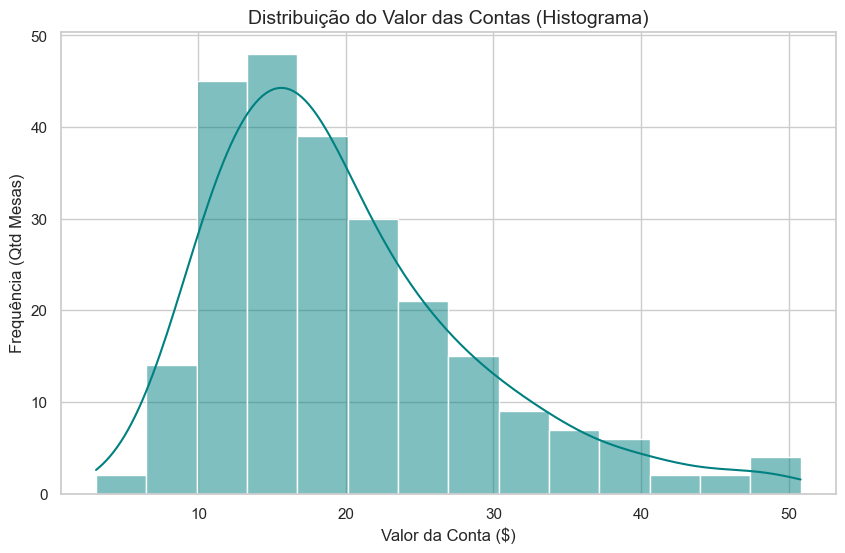

In [52]:
# Criando a figura (sim, ainda usamos plt.subplots para controlar o tamanho!)
fig, ax = plt.subplots(figsize=(10, 6))

# O comando mágico do Seaborn
sns.histplot(data=tips, x='total_bill', kde=True, color='teal', ax=ax)

ax.set_title('Distribuição do Valor das Contas (Histograma)', fontsize=14)
ax.set_xlabel('Valor da Conta ($)')
ax.set_ylabel('Frequência (Qtd Mesas)')

plt.show()


In [68]:
tips['tip'].corr(tips['total_bill'])

np.float64(0.6757341092113645)

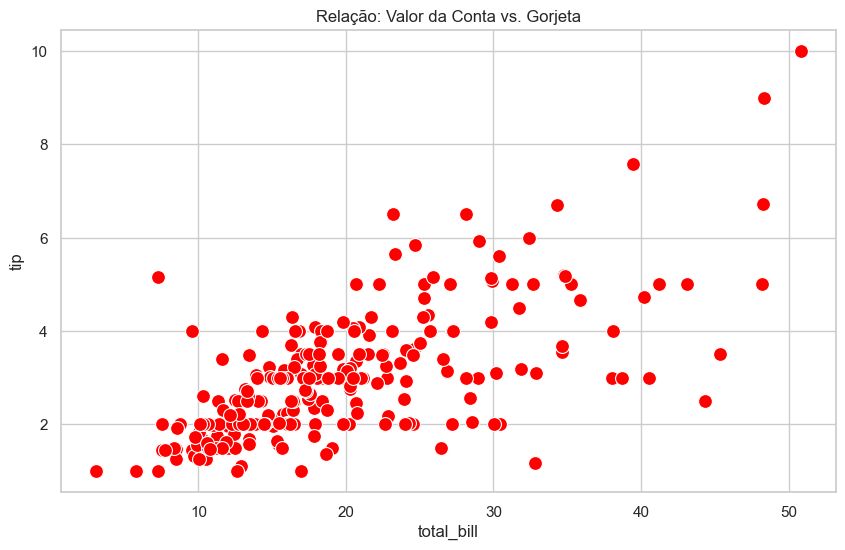

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))

# Scatterplot: X e Y são numéricos
sns.scatterplot(data=tips, x='total_bill', y='tip',  
                s=100,
                color="red",
                ax=ax, 
                 )
ax.set_title('Relação: Valor da Conta vs. Gorjeta')
plt.show()

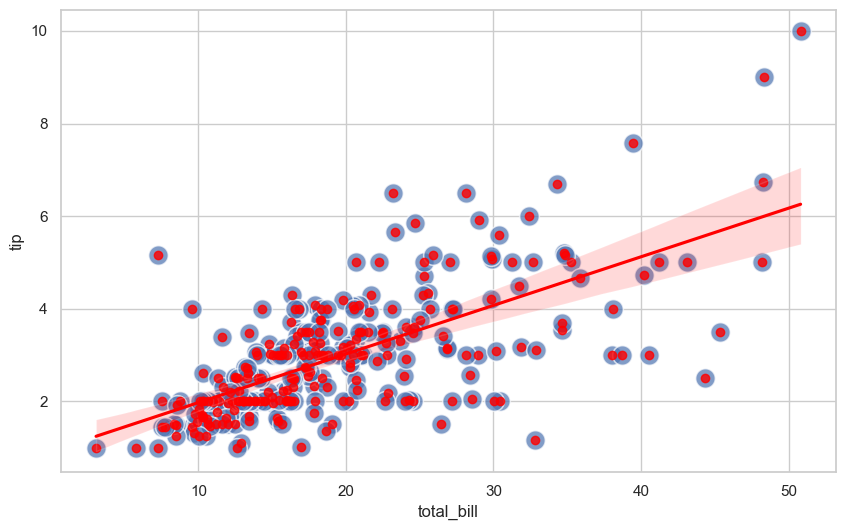

In [29]:
fig, ax = plt.subplots(figsize=(10, 6))

# Scatterplot: X e Y são numéricos
sns.scatterplot(data=tips, x='total_bill', y='tip', s=200, alpha=0.7, ax=ax)
sns.regplot(data=tips, x='total_bill', y='tip', scatter=True, color='red', ax=ax)

plt.show()

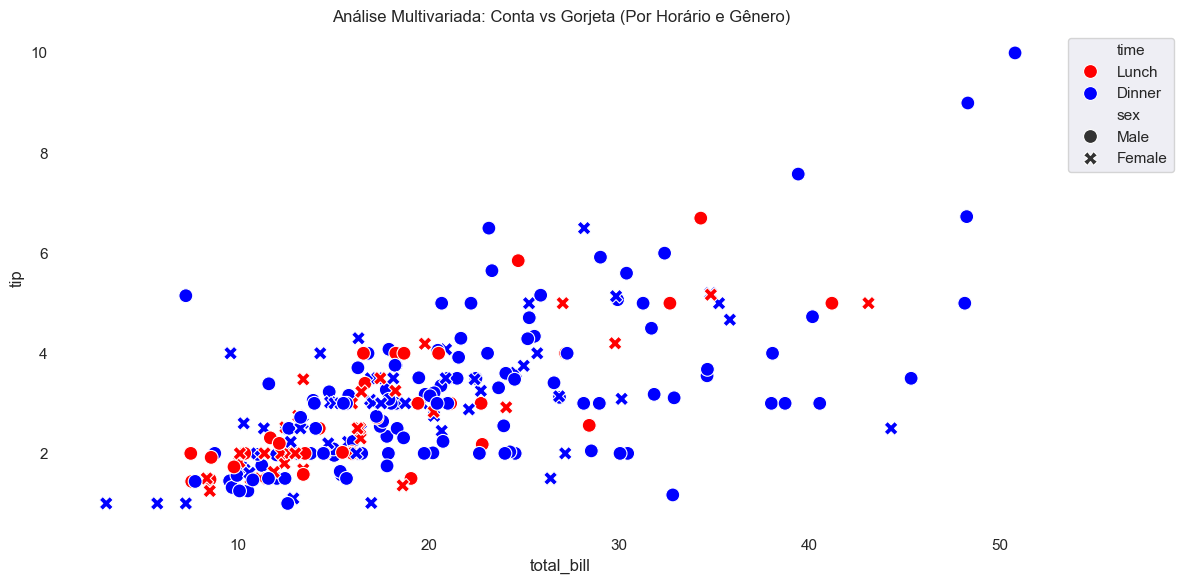

In [98]:
fig, ax = plt.subplots(figsize=(12, 6))


sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
sns.set_style(style='darkgrid')
sns.scatterplot(data=tips, 
                x='total_bill', 
                y='tip', 
                hue='time',     # Colore por horário
                style='sex',    # Muda forma por gênero
                s=100,          # Tamanho da bolinha
                palette=['red', 'blue'], # Paleta de cores moderna
                ax=ax)

ax.set_title('Análise Multivariada: Conta vs Gorjeta (Por Horário e Gênero)')
plt.legend(bbox_to_anchor=(1, 1), loc=2) # Joga a legenda para fora
plt.tight_layout()
plt.show()

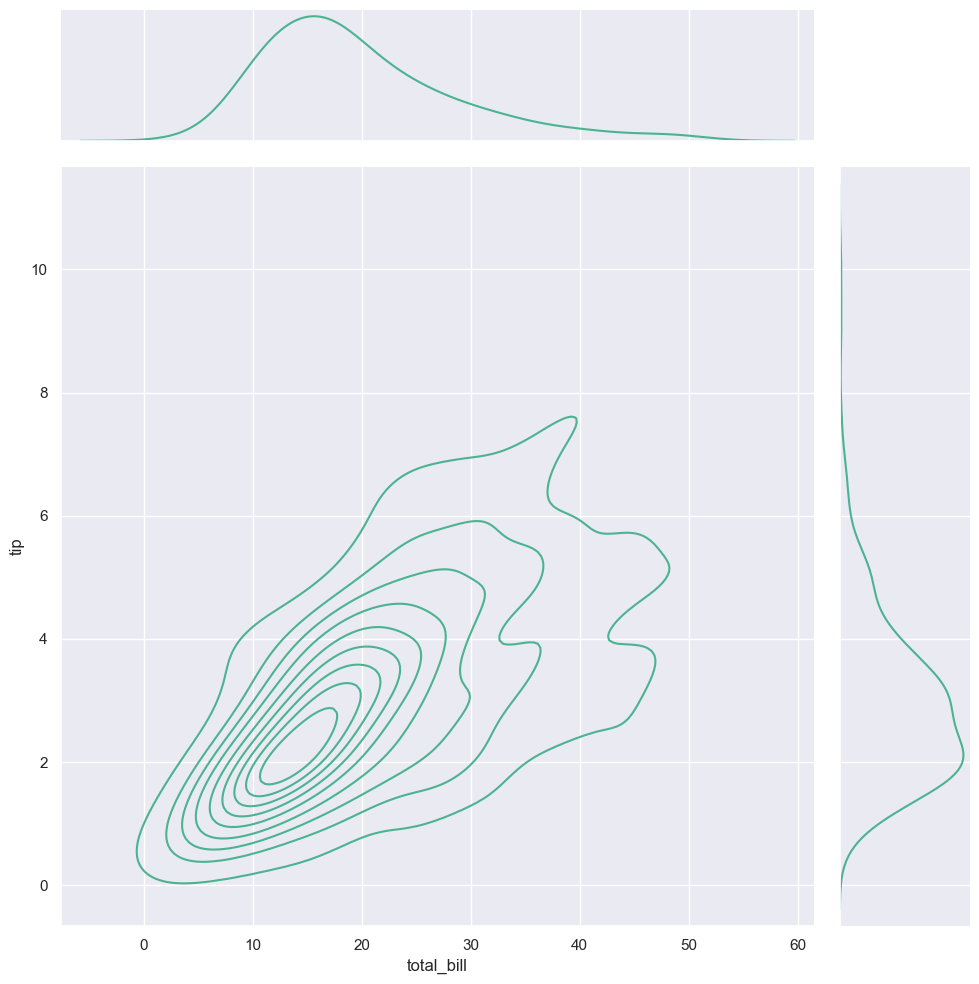

In [106]:
# Jointplot une o Scatter (meio) com os Histogramas (bordas)
sns.jointplot(data=tips, 
              x='total_bill', 
              y='tip', kind='kde', 
              height=10, color='#4CB391')
## plot_kinds = ["scatter", "hist", "hex", "kde", "reg", "resid"]
plt.show()

## Titanic

In [40]:
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [107]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [108]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


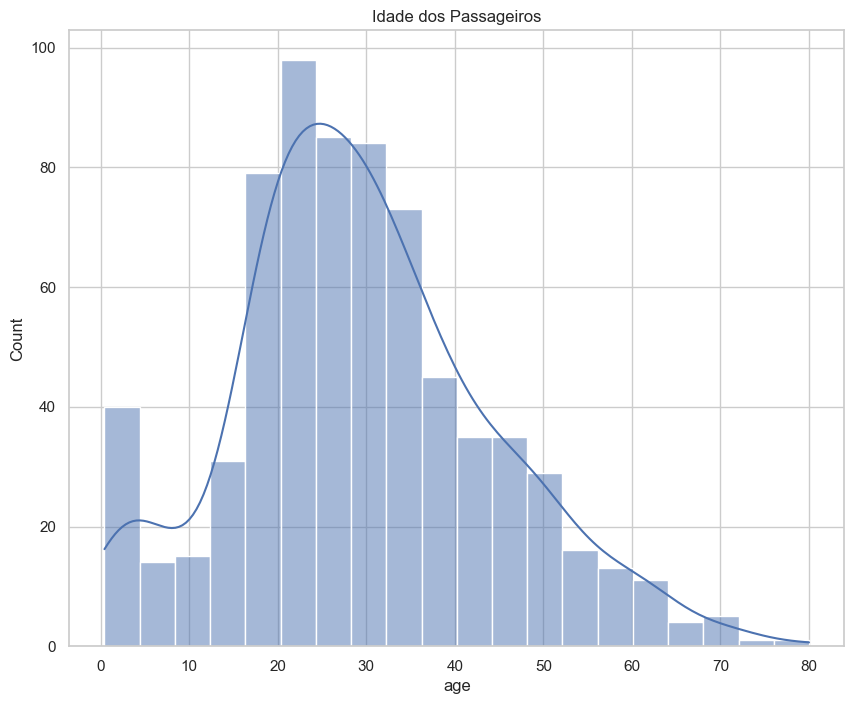

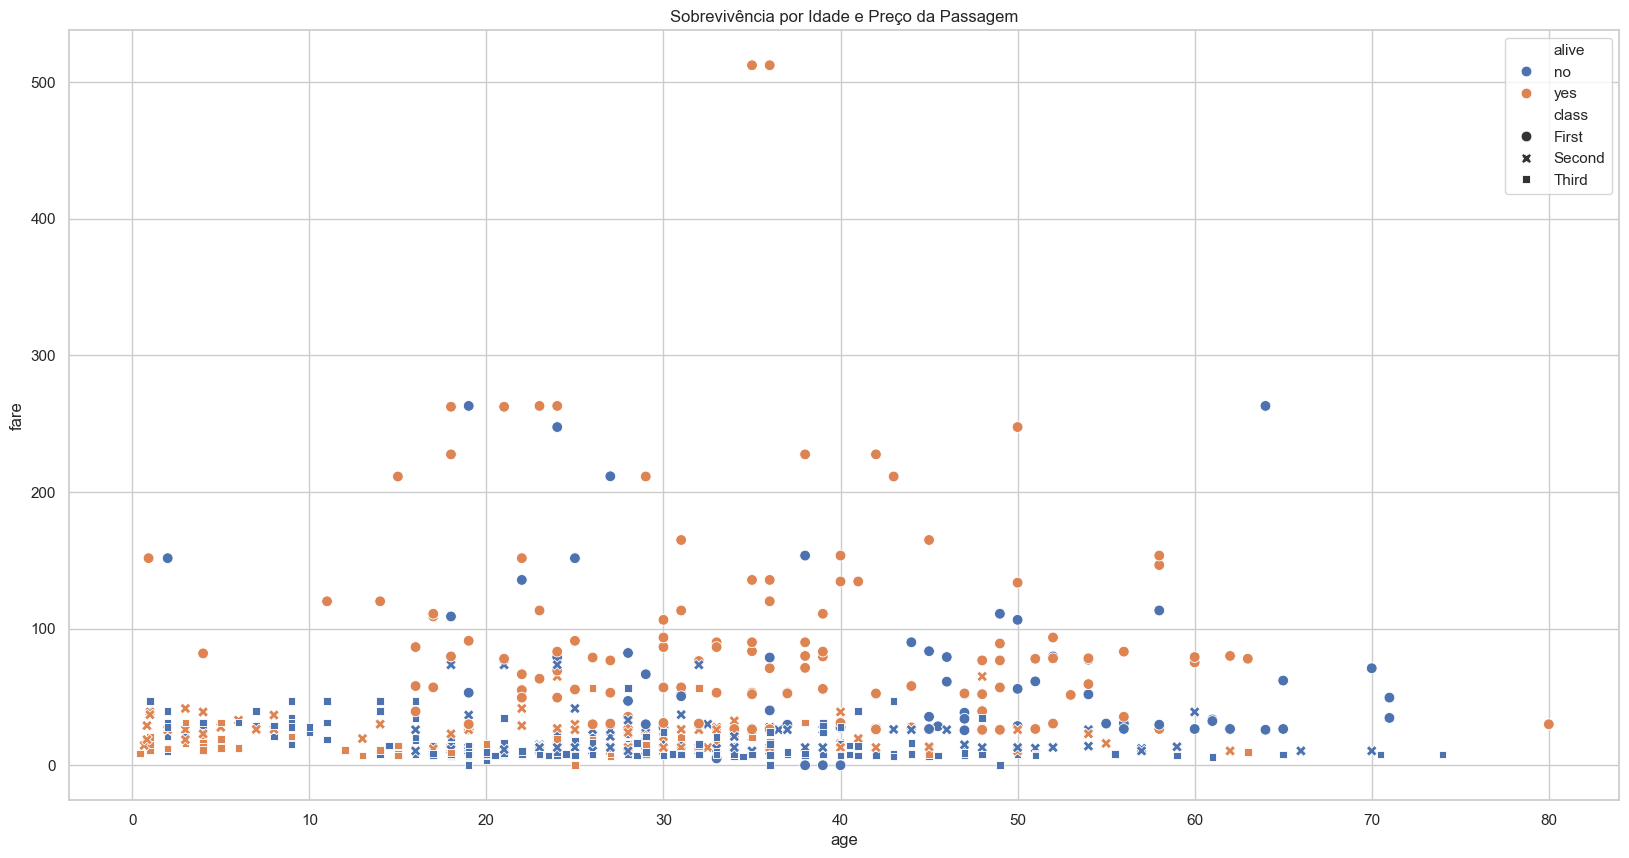

In [ ]:
plt.figure(figsize=(10, 8))
sns.histplot(data=titanic, x='age', kde=True)
plt.title('Idade dos Passageiros')
plt.show()

plt.figure(figsize=(20, 10))
sns.scatterplot(data=titanic, x='age', y='fare', hue='alive', style='class', s=60)
plt.title('Sobrevivência por Idade e Preço da Passagem')
plt.show()

#desafio: remover outliers do scatterplot

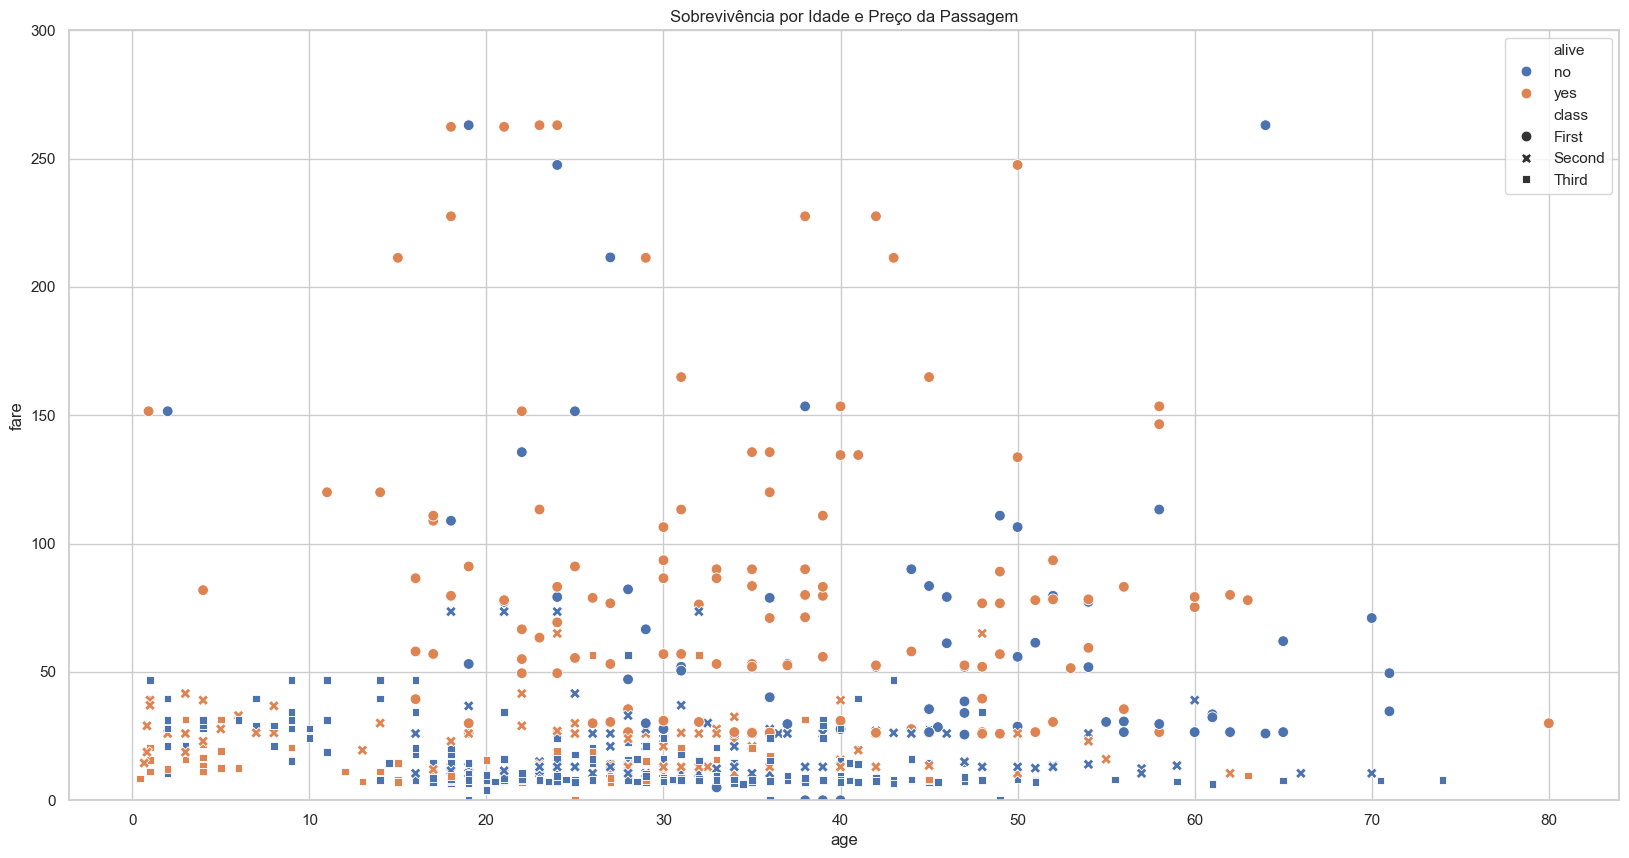